# Cardiovascular Disease Prediction using Machine Learning

In this project, we predict the possibility of (cardiovascular) heart disease in individuals.

## 1. Introduction and Objectives

This project aims to leverage the power of machine learning (ML) to develop a robust and interpretable predictive model for CVD. By incorporating Explainable AI (XAI) techniques, the model strives to address the "black-box" nature of traditional ML models, enhancing the trust and understanding of healthcare professionals. Additionally, the integration of risk stratification will provide a comprehensive assessment of patient risk levels, ensuring actionable insights for clinical decision-making. <br />

Objectives
- O1: Conduct a detailed study on cardiovascular diseases - Research and understand the
basic concepts of CVD and its risk factors. <br />
- O2: Perform Exploratory Data Analysis (EDA)- Apply appropriate data preprocessing techniques to ensure the dataset used in this study is of high quality. <br />

- O3: Evaluate Established Machine Learning Models- Investigate and evaluate the suitability of various models, such as Logistic Regression, Random Forests, and Deep learning techniques, for predicting cardiovascular disease. <br />
- O4: Optimal Feature Selection- Identify significant predictive features whose presence improves the accuracy of CVD prediction. <br />
- O5: Machine Learning Model Development- Develop a model for predicting cardiovascular diseases with various ML algorithms, deep learning techniques, and risk stratification. <br />
- O6: Model Performance Evaluation- Evaluate the developed model to check its predictive accuracy and interpretability by employing relevant evaluation metrics.


### Attribute Description

Demographics
- **male**: (1 = Male, 0 = Female)
- **age**: Age of the individual
- **education**: Level of education </br>

Medical factors
- **BPMeds**:  (1 = Taking blood pressure medication, 0 = Not taking)
- **prevalentStroke**: (1 = History of stroke, 0 = No history)
- **prevalentHyp**: (1 = History of hypertension, 0 = No history)
- **diabetes**: (1 = Diagnosed with diabetes, 0 = Not diagnosed)
- **totChol**: Total cholesterol level (mg/dL)
- **sysBP**: Systolic blood pressure (mmHg)
- **diaBP**: Diastolic blood pressure (mmHg)
- **BMI**: Body Mass Index (BMI) of the individual
- **heartRate**: Resting heart rate (beats per minute)
- **glucose**: Blood glucose level (mg/dL) </br>

Lifestyle factors
- **currentSmoker**:(1 = Current smoker, 0 = Non-smoker)
- **cigsPerDay**: Number of cigarettes smoked per day </br>

Target variable
- **TenYearCHD**: Binary target variable (1 = Individual developed CHD within 10 years, 0 = Did not develop CHD)


In [6]:
# import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
import shap
import lime
import lime.lime_tabular
import joblib
import tensorflow as tf
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve,  roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow import keras


In [8]:
heart_data = pd.read_csv('data/framingham.csv')
# Print the first 10 lines of the dataset
print(heart_data.head(10)) 

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  2

## 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in understanding the structure, relationships, and patterns in the dataset. Below, we perform detailed analyses using descriptive statistics, visualizations, and correlation heatmaps to uncover key insights about heart disease.

In [12]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [8]:
# Checking the data shape
heart_data.shape

(4240, 16)


The dataset has 4240 rows and 16 columns for different attributes. In the next step, we check for missing values in the data.

In [10]:
# Check for Missing Values
print("Missing Values:\n", heart_data.isnull().sum())

Missing Values:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


There are missing values in certain attributes like education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose.
Total number of missing values is 645. As it conforms to a small weightage of the total dataset, the missing values are removed.

In [14]:
# Remove rows with missing values
heart_data = heart_data.dropna()

# Verify if all missing values are removed
print("Missing Values After Removal:\n", heart_data.isnull().sum())


Missing Values After Removal:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


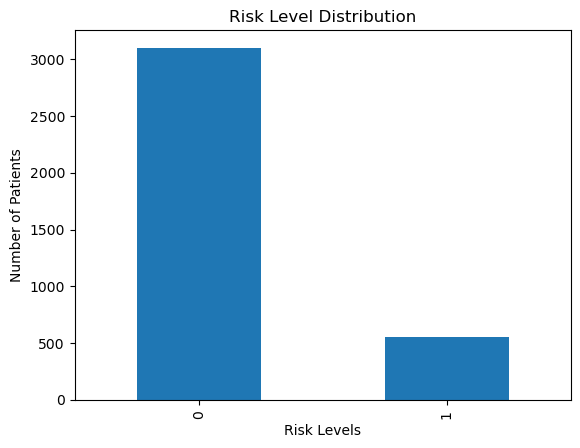

TenYearCHD
0    3101
1     557
Name: count, dtype: int64


In [7]:
# Plot risk level distribution
heart_data['TenYearCHD'].value_counts().plot(kind='bar')
plt.title("Risk Level Distribution")
plt.xlabel("Risk Levels")
plt.ylabel("Number of Patients")
plt.show()
print(heart_data['TenYearCHD'].value_counts())

There is a class imbalance in the TenYearCHD class.

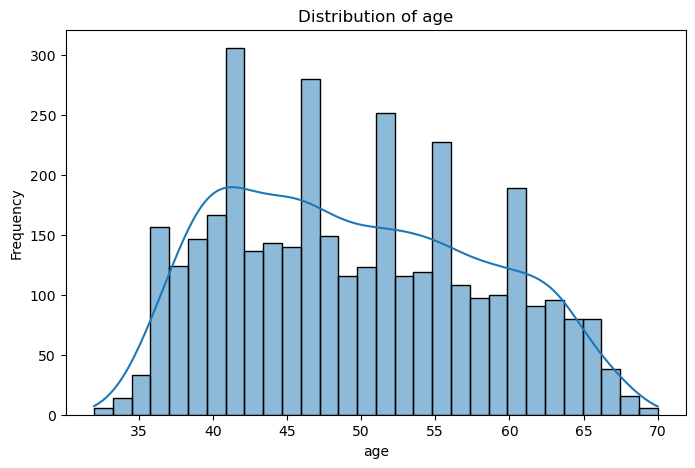

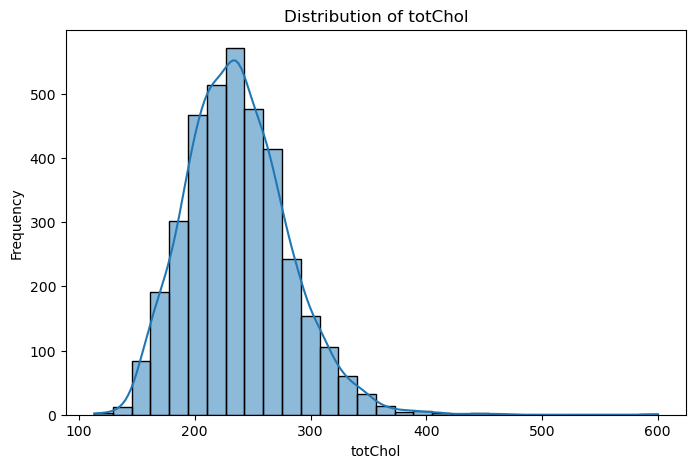

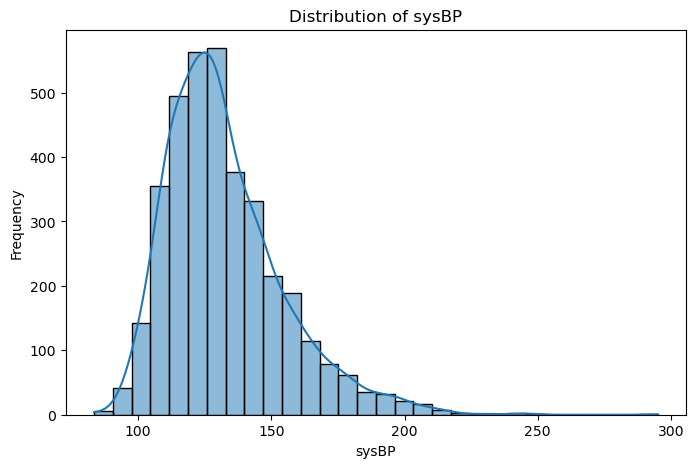

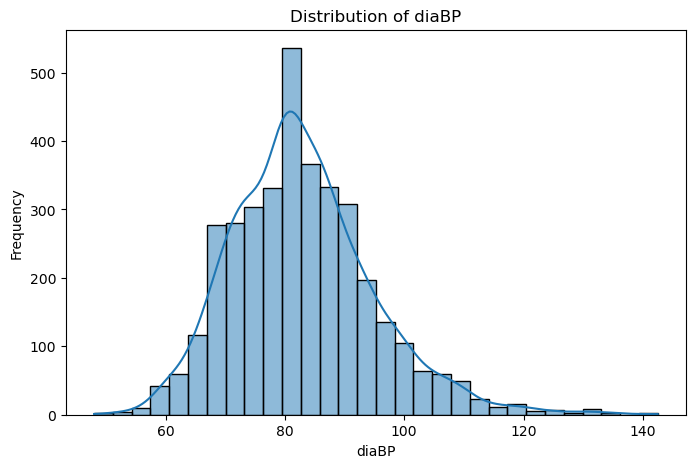

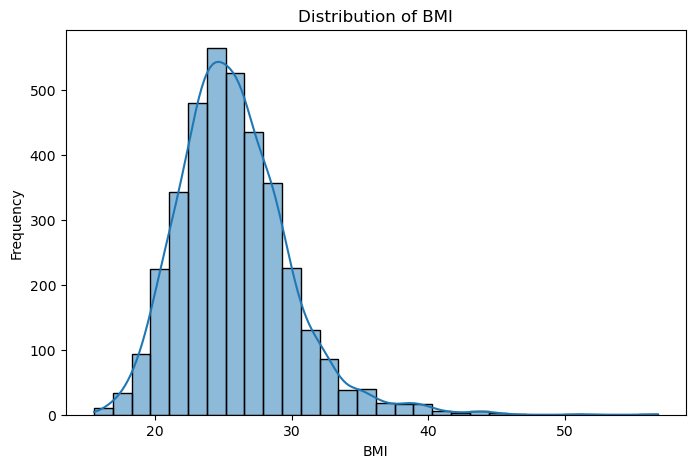

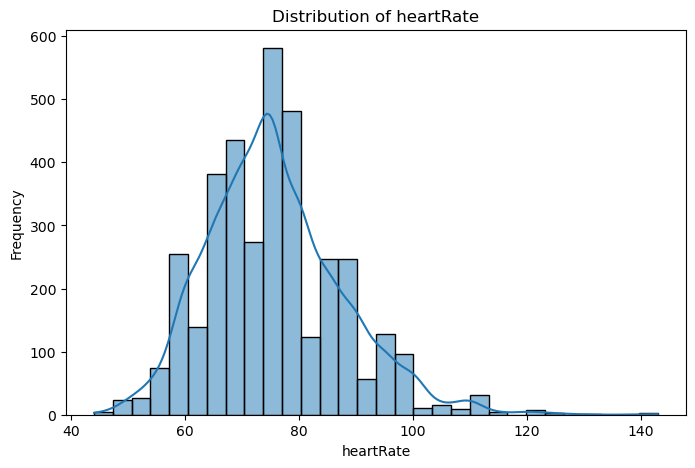

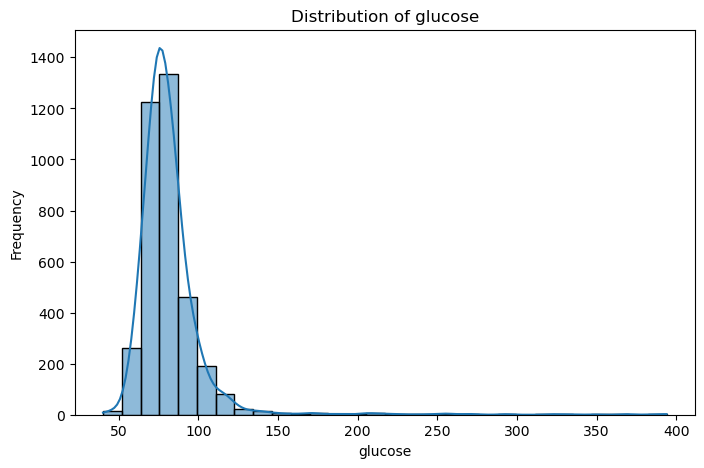

In [94]:
# Distribution of key numeric features
key_features = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate','glucose']
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(heart_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

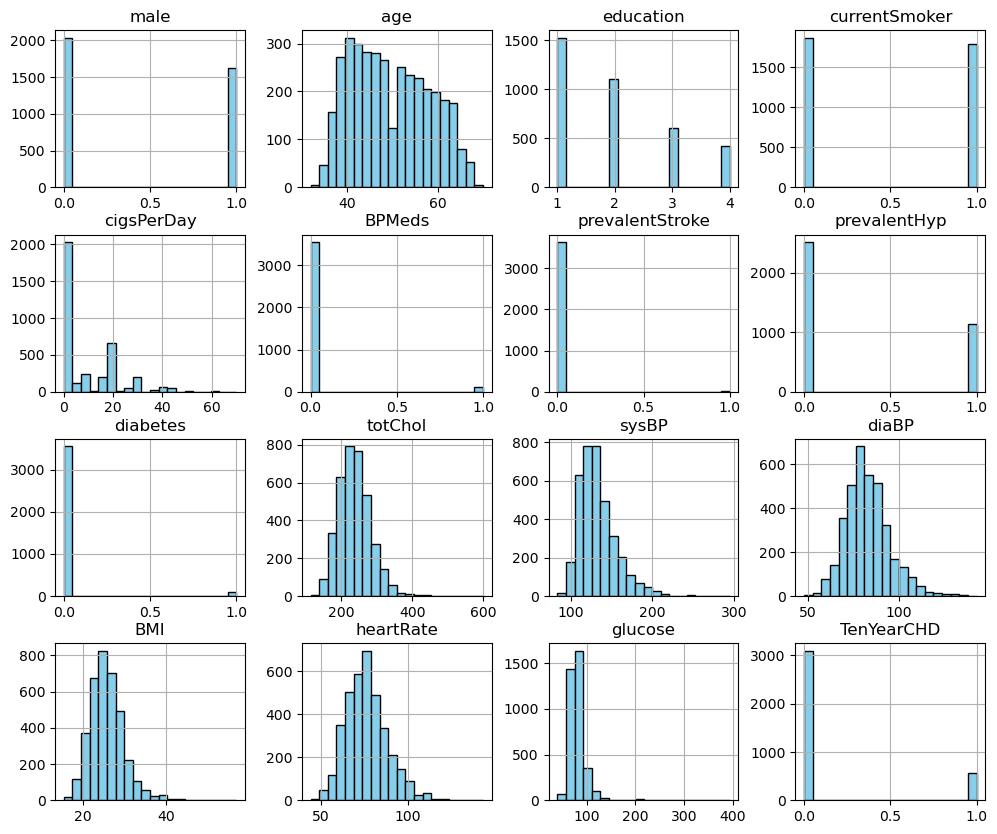

In [96]:
heart_data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

##### Insights from histograms 

- Age: The distribution is slightly right-skewed, with most individuals between 40 to 60 years. </br>
- CigsPerDay: The majority of people either don’t smoke or smoke very little. </br>
- TotChol: Roughly normal distribution, centered around 200–250 mg/dL. </br>
- SysBP: Slightly right-skewed, with most values between 110 and 180 mmHg. </br>
- Heart Rate: Normally distributed, with most values around 60–90 bpm.

In [9]:
# Statistical measure of data
pd.set_option("display.float", "{:.2f}".format)
heart_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00,3658.00
mean,0.44,49.55,1.98,0.49,9.03,0.03,0.01,0.31,0.03,236.85,132.37,82.92,25.78,75.73,81.85,0.15
std,0.50,8.56,1.02,0.50,11.92,0.17,0.08,0.46,0.16,44.10,22.09,11.97,4.07,11.98,23.90,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,113.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,0.00,42.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.08,68.00,71.00,0.00
50%,0.00,49.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.38,75.00,78.00,0.00
75%,1.00,56.00,3.00,1.00,20.00,0.00,0.00,1.00,0.00,263.00,143.88,90.00,28.04,82.00,87.00,0.00
max,1.00,70.00,4.00,1.00,70.00,1.00,1.00,1.00,1.00,600.00,295.00,142.50,56.80,143.00,394.00,1.00


##### **Insights**
The dataset consists of 44% males and 56% females, making the gender class relatively balanced. <br>
Age : The dataset contains individuals aged 32 to 70 years, with a median of 49 years. <br>

Cholesterol levels range from 113 to 600 mg/dL.<br>
BPMeds (0.03 mean): Only 3% of the population is on blood pressure medication.<br>
Prevalent Stroke (0.01 mean): Stroke cases are very rare (only 1% of individuals).<br>
31% of individuals have hypertension, which is a significant portion of the dataset.<br>

BMI (Mean: 25.78, Max: 56.80): The average BMI is 25.78, which is considered slightly overweight.  <br>

Only 3% of individuals have diabetes, meaning it's an imbalanced feature. <br>
TenYearCHD (0.15 mean): 15% of individuals have developed CHD (Cardiovascular Disease) within ten years.<br>
The dataset is imbalanced, as 85% did not develop CHD.<br>

Almost half of the population are current smokers.<br>
CigsPerDay (Mean: 9.03, Max: 70):  The median (50%) is 0, meaning at least half of the individuals don’t smoke.<br>
However, some individuals smoke as many as 70 cigarettes per day.<br>


#### Box plots 

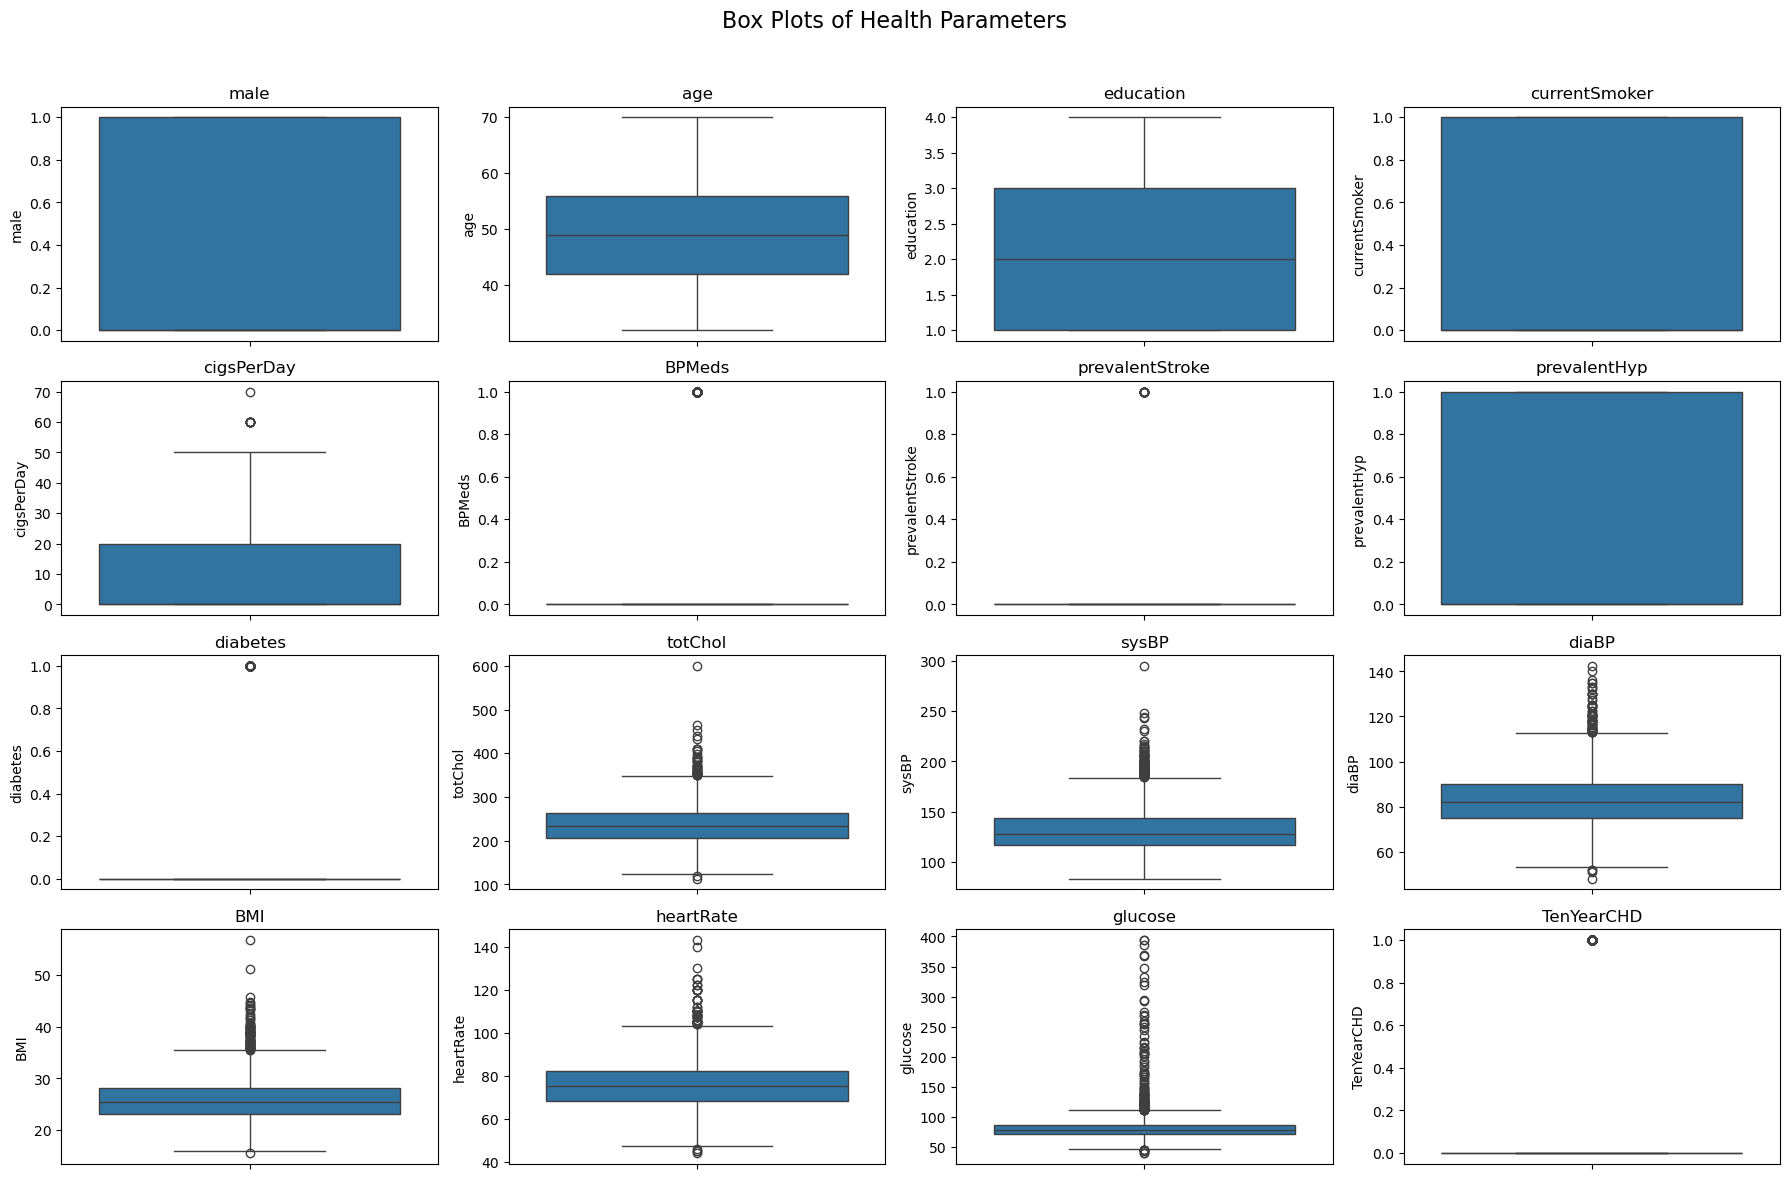

In [20]:
# Creating subplots for better visibility of each feature
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
fig.suptitle("Box Plots of Health Parameters", fontsize=16)

# Loop through the columns and plot each one
for ax, col in zip(axes.flatten(), heart_data.columns):
    sns.boxplot(y=heart_data[col], ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

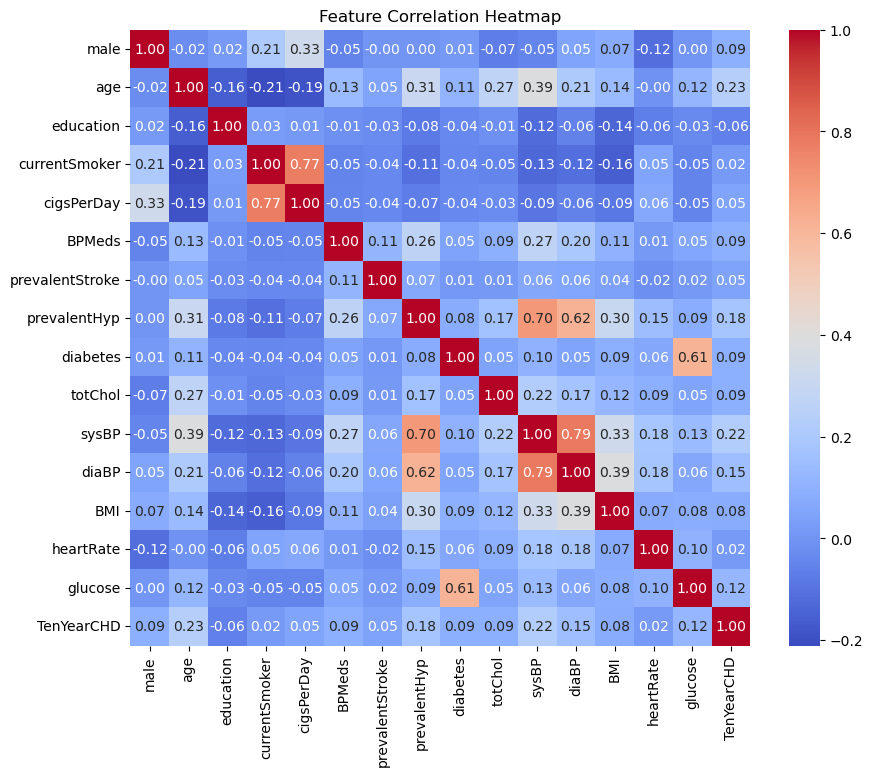

In [98]:
# Convert all columns to numeric where possible
heart_data = heart_data.apply(pd.to_numeric, errors='coerce')

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [22]:
# Select numeric data
numeric_data = heart_data.select_dtypes(include=['float64', 'int64'])

# Compute correlations with 'TenYearCHD'
correlations = numeric_data.drop('TenYearCHD', axis=1).corrwith(numeric_data['TenYearCHD'])

# Plot correlation using hvplot
import hvplot.pandas  # Ensure hvplot is imported
correlations.hvplot.barh(
    width=600, height=400,
    title="Correlation between Heart Disease and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

##### **Feature Correlation Analysis**

The correlation heatmap visually represents the relationships between various features in the dataset. It highlights both positive and negative correlations, which can be used to select significant predictors for the model. Features with strong correlations (positive or negative) with the target variable (`TenYearCHD`) are crucial for prediction.

##### **Key Observations**:
1. **Strong Correlations**:
   - `Age` shows a high positive correlation with the target variable (`TenYearCHD`), indicating people who are older have more risk of heart disease.
   - `sysBP` and `prevalentHyp ` also show a slight positive correlation with `TenYearCHD`.
   - `sysBP` and `diaBP` are strongly correlated with each other.

2. **Negative Correlations**:
   - `education` has a  negative correlation with `TenYearCHD`, suggesting an inverse proportion.

3. **Low or Neutral Correlations**:
   - Features like `heartRate` and `currentSmoker` have weaker correlations with the target variable.

## 3. Data Processing 

After exploring the dataset, the following preprocessing steps were carried out.
#### **1. Handling Missing Values**
- Rows or columns with significant missing values were removed to avoid introducing bias into the model.
- **Justification**: Imputation techniques were considered but not implemented due to potential distortion in small datasets. Eliminating incomplete data ensures that the model trains on accurate information.

#### **2. Splitting the Dataset**
- The dataset was split into training and testing sets (80% training, 20% testing).
- **Justification**: This ensures that the model can generalize to unseen data, allowing for reliable evaluation of its performance.

#### **3. Feature Scaling**
- Standardization was applied to scale features like cholesterol and blood pressure to have a mean of zero and a standard deviation of one.
- **Justification**: Scaling ensures that the gradient-based optimization processes during model training converge more efficiently.


We dropped the rows with missing values.

In [24]:

# Separate features and target variable
X = heart_data.drop(columns=["TenYearCHD"]) #Features
y = heart_data["TenYearCHD"] # target


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Compute class weights dynamically
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}


# Standardize continuous variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, "model/scaler_framingham.pkl")

# K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Output Dataset Shapes
print("Full Dataset Shape:", X.shape)
print("Training Dataset Shape:", X_train.shape)
print("Testing Dataset Shape:", X_test.shape)

Full Dataset Shape: (3658, 15)
Training Dataset Shape: (2926, 15)
Testing Dataset Shape: (732, 15)


In [43]:
# # 🚀 Feature Impact Analysis Using Logistic Regression

# from sklearn.linear_model import LogisticRegression
# import numpy as np

# # Train Logistic Regression Model
# log_model = LogisticRegression()
# log_model.fit(X, y)  # Train on full dataset

# # Extract Coefficients
# feature_names = X.columns
# coefficients = log_model.coef_[0]  # Extract coefficients

# # Convert Coefficients to Odds Ratios
# odds_ratios = np.exp(coefficients)  # Exponentiate to interpret change in odds

# # Format and Interpret Coefficients
# interpretations = []
# for feature, odds_ratio in zip(feature_names, odds_ratios):
#     percent_change = round((odds_ratio - 1) * 100, 2)  # Convert to percentage
#     if percent_change > 0:
#         interpretation = f"🔹 For every unit increase in **{feature}**, the odds of CHD increase by **{percent_change}%**."
#     else:
#         interpretation = f"🔹 For every unit increase in **{feature}**, the odds of CHD decrease by **{abs(percent_change)}%**."
#     interpretations.append(interpretation)

# # 🚀 Display Interpretations
# print("\n📊 **Feature Insights on CHD Risk:**\n")
# for insight in interpretations:
#     print(insight)

## 4. Feature Selection and Importance 

In [53]:
# 3. SelectKBest Using Chi-Squared Test
# Note: Chi-squared requires non-negative data, so ensure normalization
from sklearn.feature_selection import chi2,SelectKBest
chi2_selector = SelectKBest(chi2, k=5)  # Select top 5 features
chi2_selector.fit(X, y)

chi2_selected_features = X.columns[chi2_selector.get_support()]
print("\nSelected Features by Chi-Squared Test:\n", chi2_selected_features)


Selected Features by Chi-Squared Test:
 Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'], dtype='object')


'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'. <br>
These features likely have a strong relationship with the target variable.

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 5 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print("Top Features Based on ANOVA F-test:")
print(feature_scores.sort_values(by='Score', ascending=False))


Top Features Based on ANOVA F-test:
            Feature  Score
1               age 211.75
10            sysBP 191.00
7      prevalentHyp 124.38
11            diaBP  84.30
14          glucose  55.23
8          diabetes  32.20
0              male  31.00
9           totChol  30.76
5            BPMeds  29.29
12              BMI  24.78
2         education  14.70
4        cigsPerDay   9.92
6   prevalentStroke   8.57
13        heartRate   1.54
3     currentSmoker   1.34


Age shows the highest F-test score, making it a significant predictor for heart disease. <br>
Both methods highlight overlapping features (age, sysBP , glucose), validating their importance for prediction.

In [59]:
# Boxplot 

In [27]:
def framingham_risk_score(age, totChol, hdl, sysBP, smoker, diabetes, gender):
    if gender == 1:  # Male
        risk_score = (52.00961 - (20.014077 * np.log(age)) + (0.65304 * np.log(totChol))
                      - (0.38698 * np.log(hdl)) + (1.90997 * np.log(sysBP)) + (0.60138 * smoker)
                      + (0.57367 * diabetes))
        s0 = 0.88936  # Baseline survival probability for men
    else:  # Female
        risk_score = (31.764 - (26.0145 * np.log(age)) + (1.1237 * np.log(totChol))
                      - (0.93263 * np.log(hdl)) + (2.5536 * np.log(sysBP)) + (0.65451 * smoker)
                      + (0.87976 * diabetes))
        s0 = 0.95012  # Baseline survival probability for women

    risk_percentage = 1 - s0 ** (np.exp(risk_score))
    return round(risk_percentage * 100, 2)

# Compute Framingham Risk Score for each row
heart_data["FraminghamRisk"] = heart_data.apply(lambda row: framingham_risk_score(row["age"], row["totChol"], 
                                                                  row["diaBP"], row["sysBP"], 
                                                                  row["currentSmoker"], row["diabetes"], row["male"]), axis=1)

# Define Risk Stratification (Low, Medium, High)
def stratify_risk(risk_score):
    if risk_score < 10:
        return "Low Risk"
    elif risk_score < 20:
        return "Moderate Risk"
    else:
        return "High Risk"

heart_data["RiskCategory"] = heart_data["FraminghamRisk"].apply(stratify_risk)



PermutationExplainer explainer: 733it [05:59,  1.98it/s]                         


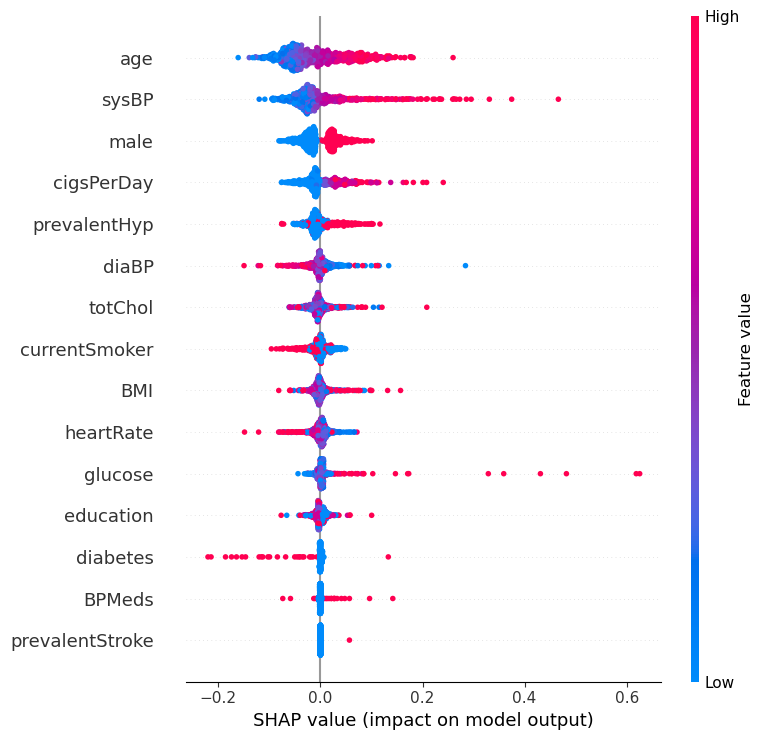

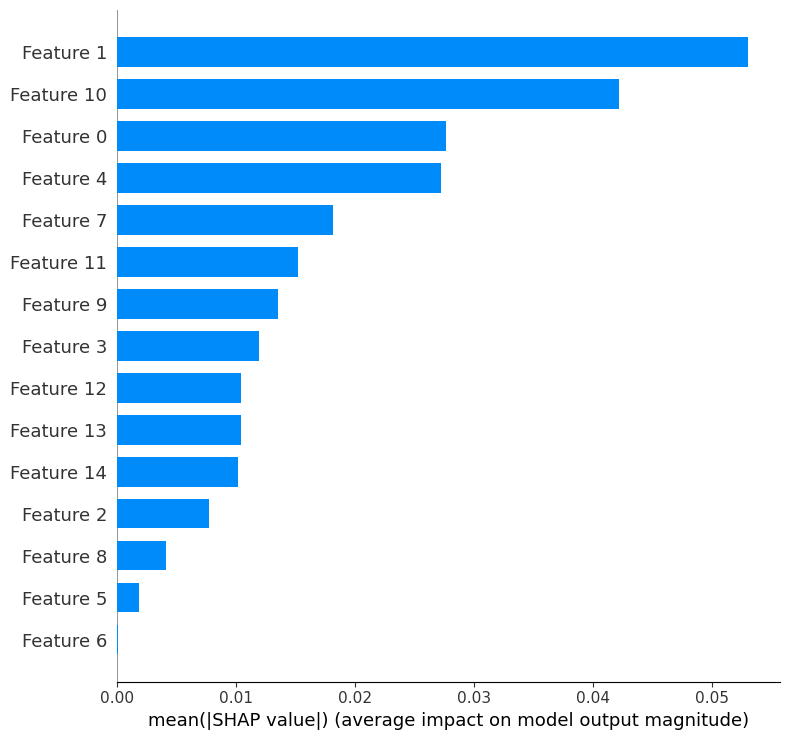

In [73]:


# Load the trained model and scaler
model = tf.keras.models.load_model("fnn_model.h5")
scaler = joblib.load("scaler_framingham.pkl")


# Initialize SHAP Explainer on the Full Dataset
explainer = shap.Explainer(model, X_train)

# Compute SHAP Values for the entire dataset
shap_values = explainer(X_test)

# 📌 **Global SHAP Summary Plot**
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, features=X_test, feature_names=X.columns)

plt.show()


### Do you think that dimensionality reduction is needed? Explain Why?
NO it's not needed.

However, in this case of the cardiovascular risk prediction dataset, it is not necessary to perform dimensionality reduction. This is because the dataset has a relatively small number of features compared to the number of samples, which means that the risk of overfitting is low. Additionally, the dataset is relatively small, so the training time for machine learning models would not be a significant issue.

## 5. Cross Validation 

In [26]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define Stratified K-Fold (Ensures class balance in each fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


## 6. Model Development 
In this section, we develop and explore the performance of 5 different models. The models explored and the reason for choosing them is mentioned below. </br>
1. Logistic Regression- Baseline model; interpretable, suitable for binary classification & simple
2. Random Forest - Handles non-linearity & feature importance by helping in understanding key risk factors.
3. XGBoost- Works well for imbalanced datasets & structured data
4. Decision Trees- Easy to interpret, low computation cost
5. Fully Connected Neural Network- Captures complex patterns, flexible learning

### 6.1 Logistic Regression

Logistic Regression - Mean AUC-ROC: 0.7348
Logistic Regression - Mean F1 Score: 0.3809
New Decision Threshold: 0.47

Logistic Regression Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       621
           1       0.31      0.61      0.41       111

    accuracy                           0.73       732
   macro avg       0.61      0.68      0.62       732
weighted avg       0.82      0.73      0.76       732



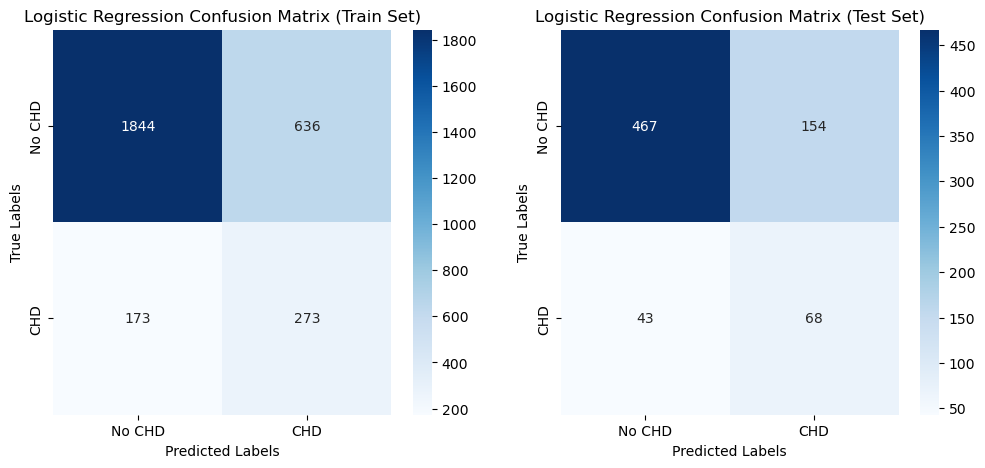

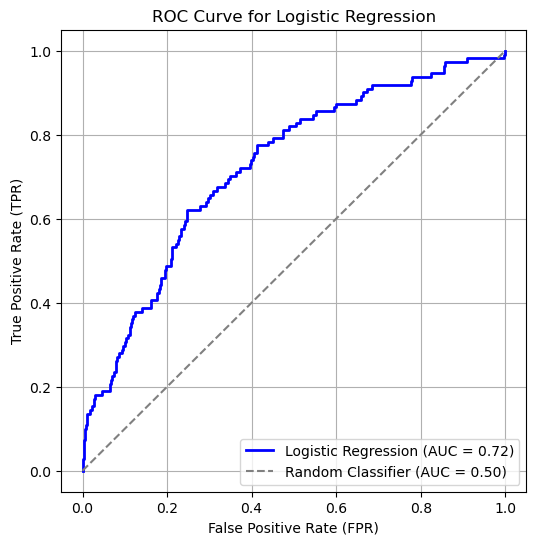

In [28]:
# Define Stratified K-Fold (Ensures class balance in each fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression Model with Class Weighting
logistic_model = LogisticRegression(class_weight={0: 1, 1: 4}, random_state=42)

# Apply K-Fold Cross-Validation
auc_scores = cross_val_score(logistic_model, X_train, y_train, cv=cv, scoring='roc_auc')
f1_scores = cross_val_score(logistic_model, X_train, y_train, cv=cv, scoring='f1')

print(f"Logistic Regression - Mean AUC-ROC: {np.mean(auc_scores):.4f}")
print(f"Logistic Regression - Mean F1 Score: {np.mean(f1_scores):.4f}")

# Train on full training data after K-Fold validation
logistic_model.fit(X_train, y_train)

# Make Predictions for Training and Testing
y_train_pred_prob = logistic_model.predict_proba(X_train)[:, 1]  # Train probabilities
y_test_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob)

# Find Best Threshold (Maximizing F1-Score)
best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]
print(f"New Decision Threshold: {best_threshold:.2f}")

# Apply New Threshold
y_train_pred = (y_train_pred_prob > best_threshold).astype(int)
y_test_pred = (y_test_pred_prob > best_threshold).astype(int)

# Compute Final Metrics
auc_lr = roc_auc_score(y_test, y_test_pred_prob) 
f1_lr = f1_score(y_test, y_test_pred)
accuracy_lr = accuracy_score(y_test, y_test_pred)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_pred_prob)

# Print Final Classification Report
print("\nLogistic Regression Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Compute Confusion Matrices
cm_train_lr = confusion_matrix(y_train, y_train_pred)
cm_test_lr = confusion_matrix(y_test, y_test_pred)

# Plot Train & Test Confusion Matrices Side by Side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train Confusion Matrix
sns.heatmap(cm_train_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"], ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix (Train Set)")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Test Confusion Matrix
sns.heatmap(cm_test_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"], ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix (Test Set)")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.show()

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### Hyper Parameter Tuning

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy      0.8534
Test Accuracy       0.8593
Train Precision     0.7179
Test Precision      0.7222
Train Recall        0.0628
Test Recall         0.1171
Train ROC AUC       0.5292
Test ROC AUC        0.5545


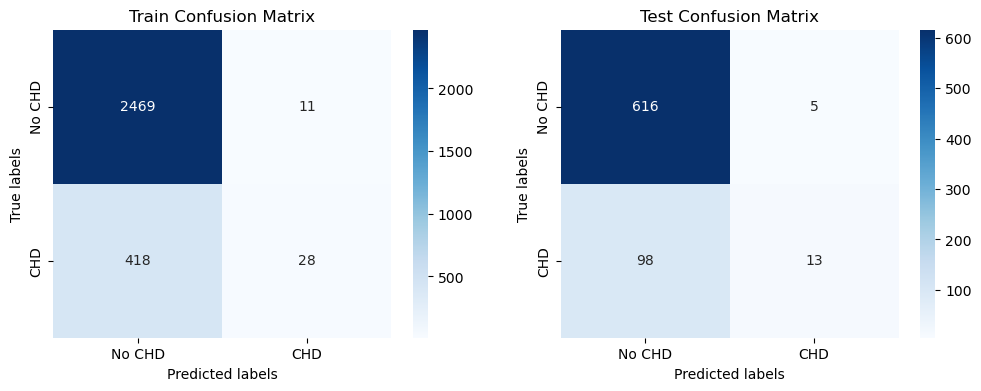

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report, confusion_matrix

#  Define a Function to Evaluate Model Performance
def model_metrics(y_train, y_test, train_preds, test_preds):
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    print(f"{'Train Accuracy':<20}{train_accuracy:.4f}")
    print(f"{'Test Accuracy':<20}{test_accuracy:.4f}")
    print(f"{'Train Precision':<20}{train_precision:.4f}")
    print(f"{'Test Precision':<20}{test_precision:.4f}")
    print(f"{'Train Recall':<20}{train_recall:.4f}")
    print(f"{'Test Recall':<20}{test_recall:.4f}")
    print(f"{'Train ROC AUC':<20}{train_roc_auc:.4f}")
    print(f"{'Test ROC AUC':<20}{test_roc_auc:.4f}")

    # Compute Confusion Matrices
    train_confusion_matrix = confusion_matrix(y_train, train_preds)
    test_confusion_matrix = confusion_matrix(y_test, test_preds)

    # 📊 Plot Train & Test Confusion Matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    labels = ['No CHD', 'CHD']

    sns.heatmap(train_confusion_matrix, annot=True, cmap='Blues', ax=axes[0], fmt="d", xticklabels=labels, yticklabels=labels)
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Train Confusion Matrix')

    sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', ax=axes[1], fmt="d", xticklabels=labels, yticklabels=labels)
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('True labels')
    axes[1].set_title('Test Confusion Matrix')

    plt.show()

# Apply Hyperparameter Optimization Using GridSearchCV
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1.0, 10.0],
              'solver': ['liblinear', 'saga']}

# Initialize Logistic Regression
logistic_regression = LogisticRegression()

# Apply GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get Best Hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

# Train with Best Parameters
logistic_regression_best = LogisticRegression(**best_params)
logistic_regression_best.fit(X_train, y_train)

# Make Predictions Using Optimized Model
y_train_logistic_pred_cv = logistic_regression_best.predict(X_train)
y_test_logistic_pred_cv  = logistic_regression_best.predict(X_test)
y_score_logistic_pred_cv = logistic_regression_best.predict_proba(X_test)[:, 1]

# Evaluate Final Model Performance
model_metrics(y_train, y_test, y_train_logistic_pred_cv, y_test_logistic_pred_cv)


#### Observations
The confusion matrix displays 
True Negatives (TN) = 467
False Positives (FP) = 154
False Negatives (FN) = 43 
True Positives (TP) = 68

AUC-ROC = 0.7348 
This means the model is 73% accurate in distinguishing between CHD and non-CHD cases.

F1 Score = 0.38
This confirms that the dataset is imbalanced, leading to fewer CHD cases being correctly classified.

Adjusting the decision threshold from 0.5 to 0.47 increased recall for CHD cases. It results in lowering the false negatives which is crucial in healthcare cases.

### 6.2 Random Forest 

Random Forest - Mean AUC-ROC: 0.8898
Random Forest - Mean F1 Score: 0.6147

Random Forest Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       621
           1       0.28      0.29      0.28       111

    accuracy                           0.78       732
   macro avg       0.58      0.58      0.58       732
weighted avg       0.78      0.78      0.78       732



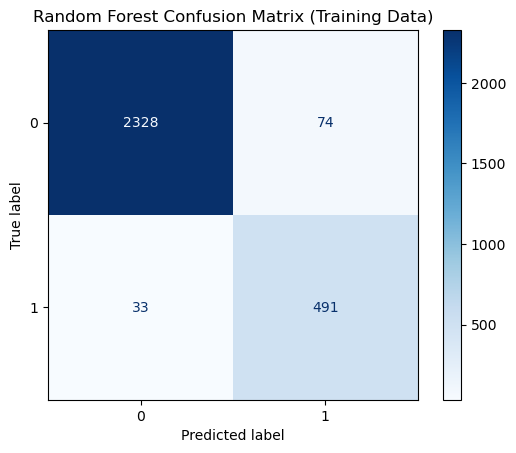

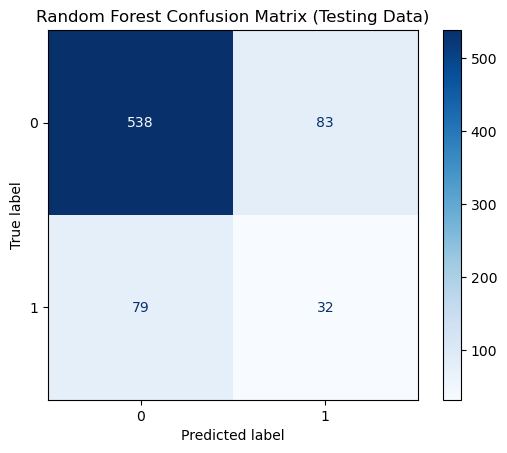

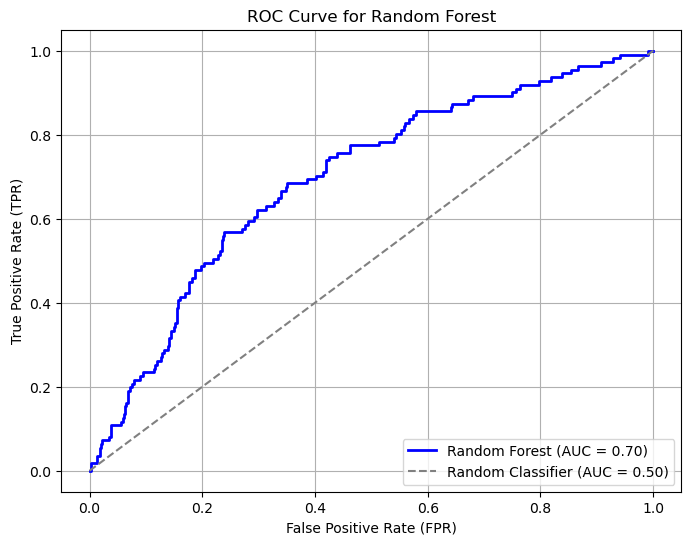

In [40]:
# Define Stratified K-Folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_forest_model = RandomForestClassifier(
    n_estimators=200,         # More trees for better generalization
    max_depth=10,             # Limits tree depth to prevent overfitting
    min_samples_split=10,     # Minimum samples to split nodes
    class_weight="balanced",  # Fixes class imbalance
    random_state=42
)

# Apply K-Fold Cross-Validation
auc_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=cv, scoring='roc_auc')
f1_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=cv, scoring='f1')
print(f"Random Forest - Mean AUC-ROC: {np.mean(auc_scores_rf):.4f}")
print(f"Random Forest - Mean F1 Score: {np.mean(f1_scores_rf):.4f}")

# Train on full training data after K-Fold validation
random_forest_model.fit(X_train, y_train)

# Make Predictions
y_test_pred = random_forest_model.predict(X_test)
y_test_pred_prob = random_forest_model.predict_proba(X_test)[:, 1] 

y_train_pred = random_forest_model.predict(X_train)
y_train_pred_prob = random_forest_model.predict_proba(X_train)[:, 1] 

# Compute Performance Metrics
auc_rf = roc_auc_score(y_test, y_test_pred_prob) 
f1_rf = f1_score(y_test, y_test_pred)
accuracy_rf = accuracy_score(y_test, y_test_pred)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_pred_prob)

# Print Final Classification Report
print("\nRandom Forest Report:")
print(classification_report(y_test, y_test_pred))

# ✅ Fix Confusion Matrix Calculation
cm_train_rf = confusion_matrix(y_train, y_train_pred)  # Use actual vs predicted labels
ConfusionMatrixDisplay(confusion_matrix=cm_train_rf, display_labels=np.unique(y_train)).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix (Training Data)")
plt.show()

cm_test_rf = confusion_matrix(y_test, y_test_pred)  # Use actual vs predicted labels
ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=np.unique(y_test)).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix (Testing Data)")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Fitting 5 folds for each of 162 candidates, totalling 810 fits

 Best Hyperparameters for Random Forest:
{'class_weight': None, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

📊 **Optimized Random Forest Report:**
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       621
           1       0.29      0.23      0.25       111

    accuracy                           0.80       732
   macro avg       0.58      0.56      0.57       732
weighted avg       0.78      0.80      0.79       732



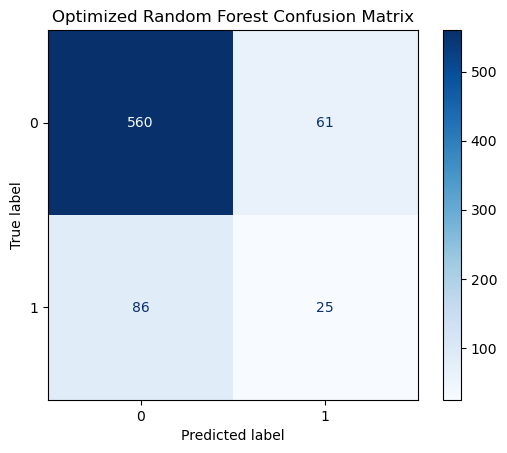

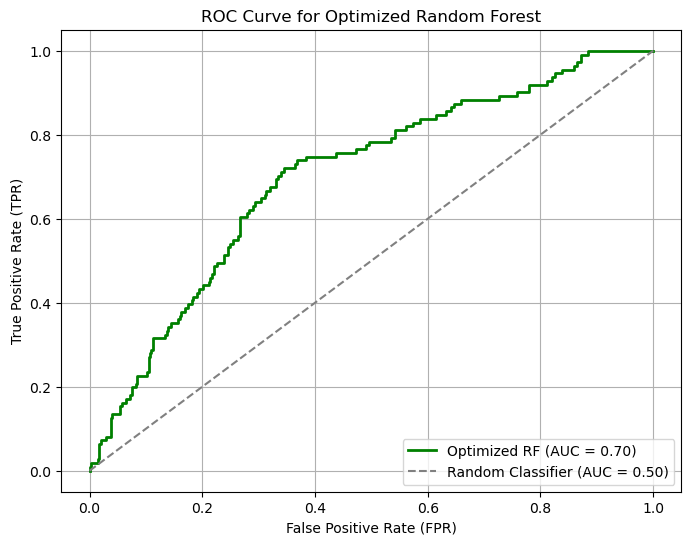

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_depth': [5, 10, 15],          # Maximum depth of the trees
    'min_samples_split': [5, 10, 20],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required at a leaf node
    'class_weight': ['balanced', None] # Class weighting for handling imbalance
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Apply GridSearchCV (5-Fold Cross-Validation)
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearch to Data
grid_search.fit(X_train, y_train)

# Get Best Parameters
best_rf_params = grid_search.best_params_
print("\n Best Hyperparameters for Random Forest:")
print(best_rf_params)

# Train Optimized Random Forest Model
optimized_rf = RandomForestClassifier(**best_rf_params, random_state=42)
optimized_rf.fit(X_train, y_train)

# Predictions Using Best Model
y_pred_rf_best = optimized_rf.predict(X_test)
y_pred_prob_rf_best = optimized_rf.predict_proba(X_test)[:, 1]  

# Compute Final Metrics
auc_rf_best = roc_auc_score(y_test, y_pred_prob_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_pred_prob_rf_best)

# Print Final Classification Report
print("\n📊 **Optimized Random Forest Report:**")
print(classification_report(y_test, y_pred_rf_best))

# Plot Optimized Confusion Matrix
cm_test_rf_best = confusion_matrix(y_test, y_pred_rf_best)
ConfusionMatrixDisplay(confusion_matrix=cm_test_rf_best, display_labels=np.unique(y_train)).plot(cmap='Blues')
plt.title("Optimized Random Forest Confusion Matrix")
plt.show()

# Plot ROC Curve for Optimized Model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_best, tpr_rf_best, label=f"Optimized RF (AUC = {auc_rf_best:.2f})", color="green", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Optimized Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### Observations
Confusion Matrix

### 6.3 XGBoost

In [20]:
!pip install xgboost


 XGBoost Report (Test Data):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       621
           1       0.29      0.32      0.30       111

    accuracy                           0.78       732
   macro avg       0.59      0.59      0.59       732
weighted avg       0.79      0.78      0.78       732



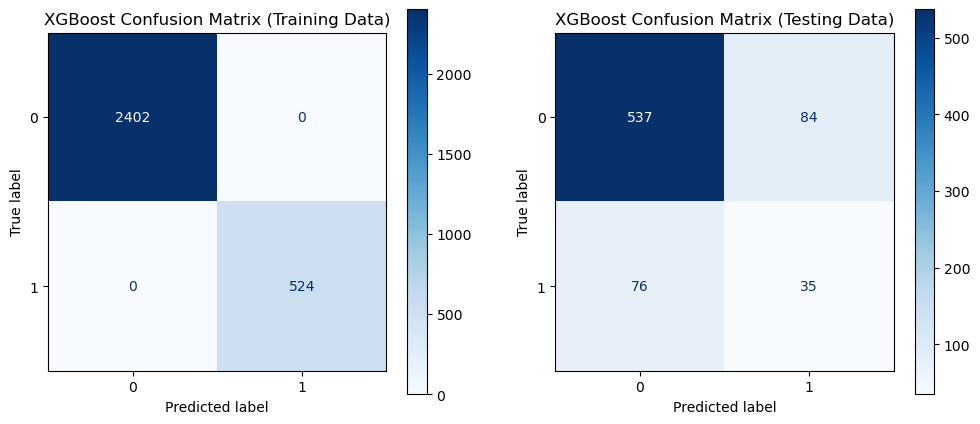

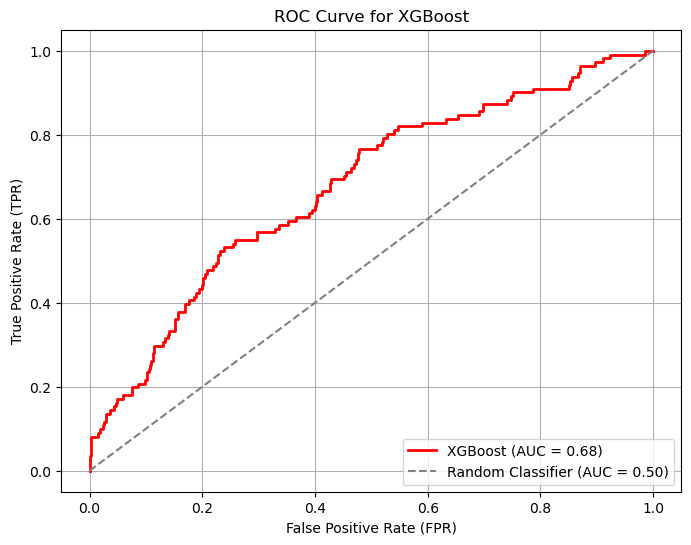

In [46]:
# Import Libraries
import xgboost as xgb
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

#  Initialize XGBoost Classifier (Handles Class Imbalance with `scale_pos_weight`)
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  
    random_state=42
)

# Train the Model
xgb_model.fit(X_train, y_train)

# Make Predictions on **Test Set**
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Make Predictions
y_train_pred_xgb = xgb_model.predict(X_train)


#  Compute Performance Metrics
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)  
f1_xgb = f1_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)

# Print Classification Report
print("\n XGBoost Report (Test Data):")
print(classification_report(y_test, y_pred_xgb))

#  Compute Confusion Matrices Separately
cm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)  # Train Confusion Matrix
cm_test_xgb = confusion_matrix(y_test, y_pred_xgb)  # Test Confusion Matrix

#  Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_train_xgb, display_labels=np.unique(y_train)).plot(cmap='Blues', ax=axes[0])
axes[0].set_title("XGBoost Confusion Matrix (Training Data)")

# Test Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_test_xgb, display_labels=np.unique(y_train)).plot(cmap='Blues', ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix (Testing Data)")

plt.show()

#  Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", color="red", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': 4.583969465648855, 'subsample': 0.8}

XGBoost Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       621
           1       0.30      0.38      0.34       111

    accuracy                           0.77       732
   macro avg       0.59      0.61      0.60       732
weighted avg       0.80      0.77      0.78       732



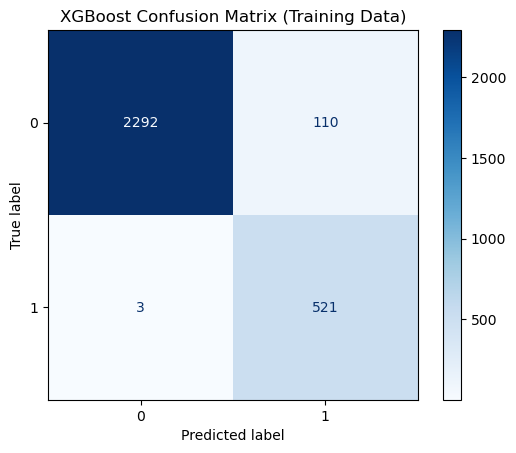

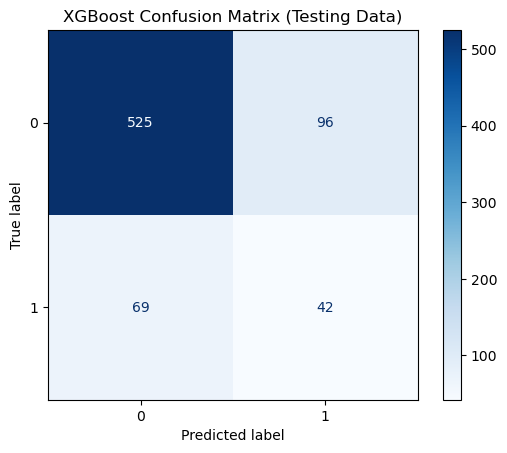

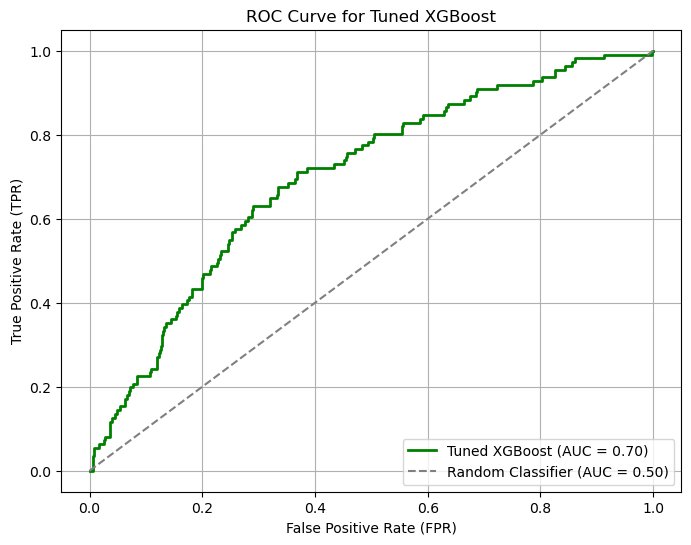

In [48]:

# Define the Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0],  
    'gamma': [0, 0.1, 0.2],  
    'scale_pos_weight': [len(y_train[y_train == 0]) / len(y_train[y_train == 1])]  
}

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Apply GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',  
    cv=5,  
    verbose=2,
    n_jobs=-1  
)

# Fit GridSearchCV to the Training Data
grid_search.fit(X_train, y_train)

# Get Best Hyperparameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters for XGBoost:", best_params)

# ✅ Use the Best Model from Grid Search
best_xgb = grid_search.best_estimator_

# Make Predictions with the Best Model
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)

# Compute Confusion Matrices
cm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)  
cm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)  

# Predict Probabilities
y_pred_prob_xgb_tuned = best_xgb.predict_proba(X_test)[:, 1]

# Compute Performance Metrics
auc_xgb_tuned = roc_auc_score(y_test, y_pred_prob_xgb_tuned)
f1_xgb_tuned = f1_score(y_test, y_test_pred_xgb)
accuracy_xgb_tuned = accuracy_score(y_test, y_test_pred_xgb)
fpr_xgb_tuned, tpr_xgb_tuned, _ = roc_curve(y_test, y_pred_prob_xgb_tuned)

# Print Final Classification Report
print("\nXGBoost Report (Tuned Model):")
print(classification_report(y_test, y_test_pred_xgb))

# Plot Confusion Matrices
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=cm_train_xgb, display_labels=np.unique(y_train)).plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix (Training Data)")
plt.show()

ConfusionMatrixDisplay(confusion_matrix=cm_test_xgb, display_labels=np.unique(y_test)).plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix (Testing Data)")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f"Tuned XGBoost (AUC = {auc_xgb_tuned:.2f})", color="green", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Tuned XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()

###  6.4 Decision Trees

Decision Tree - Mean AUC-ROC: 0.7648
Decision Tree - Mean F1 Score: 0.5317

Classification Report (Testing Data - Decision Tree):
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       621
           1       0.26      0.47      0.33       111

    accuracy                           0.72       732
   macro avg       0.57      0.61      0.58       732
weighted avg       0.79      0.72      0.75       732



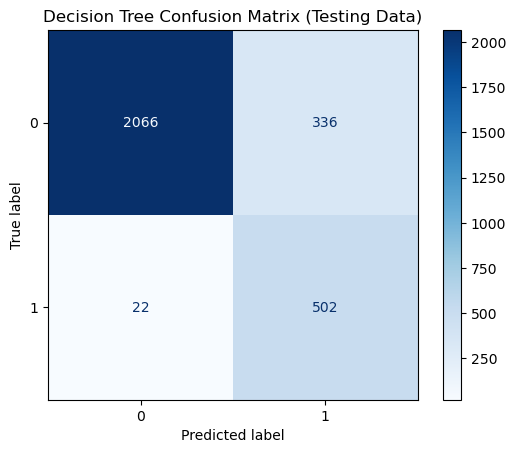

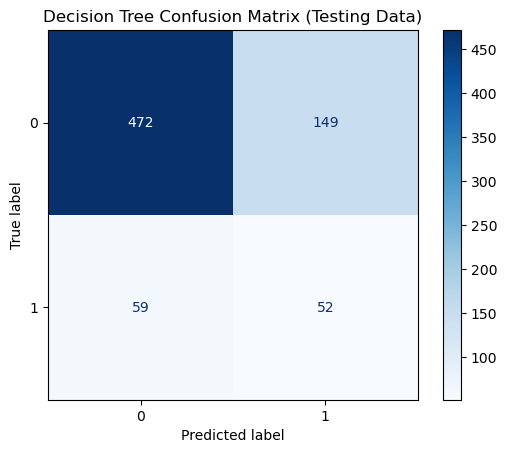

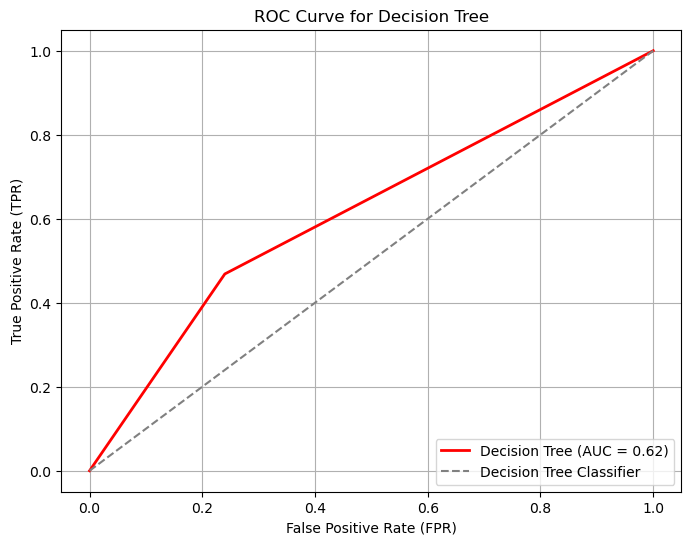

In [50]:
# Define Stratified K-Fold (Ensures class balance in each fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_model = DecisionTreeClassifier(
    max_depth=10,              # Limits tree depth to prevent overfitting
    min_samples_split=10,      # Minimum samples required to split a node
    class_weight="balanced",   # Fixes class imbalance
    random_state=42
)

# Apply K-Fold Cross-Validation
auc_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='roc_auc')
f1_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='f1')

print(f"Decision Tree - Mean AUC-ROC: {np.mean(auc_scores_dt):.4f}")
print(f"Decision Tree - Mean F1 Score: {np.mean(f1_scores_dt):.4f}")

# Train on full training data after K-Fold validation
dt_model.fit(X_train, y_train)

# Make Predictions
Y_train_pred_dt = dt_model.predict(X_train)
Y_train_pred_prob_dt = dt_model.predict_proba(X_train)[:, 1]  # Probabilities for AUC-ROC

Y_test_pred_dt = dt_model.predict(X_test)
Y_test_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Compute Performance Metrics
accuracy_dt = accuracy_score(y_test, Y_test_pred_dt)
f1_dt = f1_score(y_test, Y_test_pred_dt)
auc_roc_dt = roc_auc_score(y_test, Y_test_pred_prob_dt)  # Use probabilities for AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, Y_test_pred_dt)

# Print Final Classification Report
print("\nClassification Report (Testing Data - Decision Tree):")
print(classification_report(y_test, Y_test_pred_dt))

# Plot Confusion Matrix
cm_train_dt = confusion_matrix(y_train, Y_train_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_train_dt).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Testing Data)")
plt.show()

# Plot Confusion Matrix
cm_test_dt = confusion_matrix(y_test, Y_test_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_test_dt).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Testing Data)")
plt.show()

#  Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_roc_dt:.2f})", color="red", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Decision Tree Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Fitting 5 folds for each of 768 candidates, totalling 3840 fits

Best Hyperparameters for Decision Tree: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2}

Classification Report (Tuned Decision Tree):
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       621
           1       0.26      0.60      0.36       111

    accuracy                           0.67       732
   macro avg       0.58      0.64      0.57       732
weighted avg       0.81      0.67      0.72       732



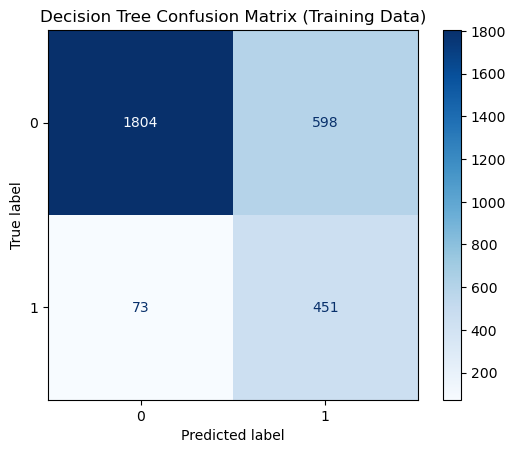

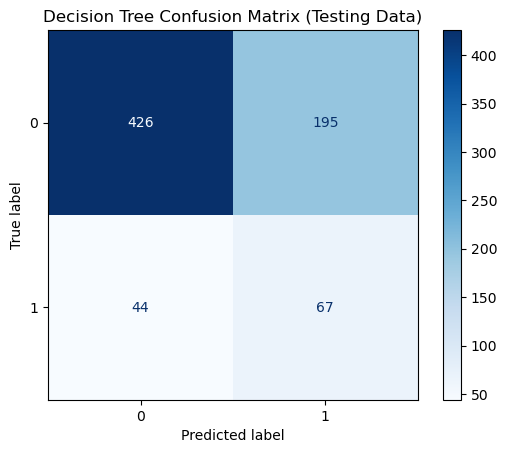

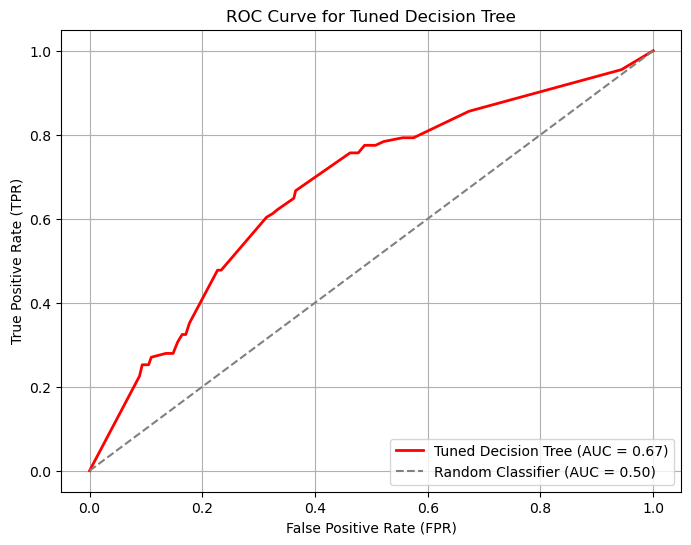

In [52]:

# Define the Parameter Grid for Tuning
param_grid = {
    'max_depth': [5, 10, 15, None],  # None allows unlimited depth
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy'],  # Two splitting criteria
    'max_features': ['sqrt', 'log2', None],  # Feature selection method
    'class_weight': [None, 'balanced']  # Handles class imbalance
}

# Define Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Apply GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for AUC-ROC Score
    cv=cv,  # 5-Fold Cross Validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV to the Training Data
grid_search.fit(X_train, y_train)

# Get Best Hyperparameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters for Decision Tree:", best_params)

# ✅ Use the Best Model from Grid Search
best_dt = grid_search.best_estimator_

# Make Predictions with the Best Model
y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)

# Predict Probabilities for ROC-AUC Calculation
y_test_pred_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# Compute Performance Metrics
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
f1_dt = f1_score(y_test, y_test_pred_dt)
auc_roc_dt = roc_auc_score(y_test, y_test_pred_prob_dt)  # Use probabilities for AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_pred_prob_dt)

# Print Final Classification Report
print("\nClassification Report (Tuned Decision Tree):")
print(classification_report(y_test, y_test_pred_dt))

# Plot Confusion Matrices
cm_train_dt = confusion_matrix(y_train, y_train_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_train_dt).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Training Data)")
plt.show()

cm_test_dt = confusion_matrix(y_test, y_test_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_test_dt).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Testing Data)")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Tuned Decision Tree (AUC = {auc_roc_dt:.2f})", color="red", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Tuned Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()

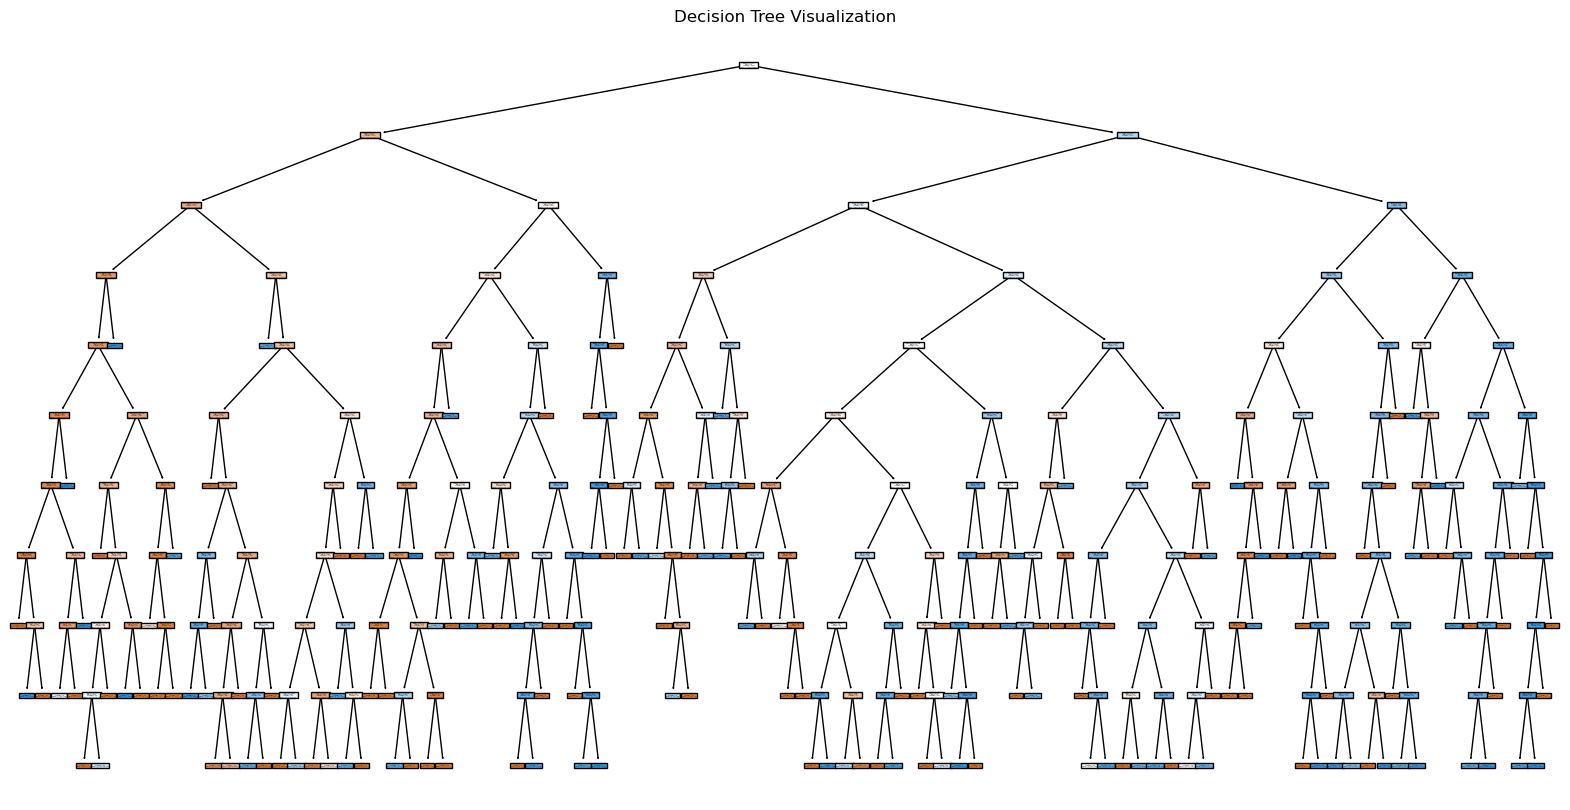


Decision Tree Rules:
|--- age <= -0.12
|   |--- diaBP <= 0.57
|   |   |--- cigsPerDay <= -0.04
|   |   |   |--- BMI <= 3.26
|   |   |   |   |--- age <= -0.93
|   |   |   |   |   |--- sysBP <= 1.43
|   |   |   |   |   |   |--- BMI <= 0.71
|   |   |   |   |   |   |   |--- totChol <= 0.65
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- totChol >  0.65
|   |   |   |   |   |   |   |   |--- totChol <= 0.76
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- totChol >  0.76
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BMI >  0.71
|   |   |   |   |   |   |   |--- diaBP <= 0.38
|   |   |   |   |   |   |   |   |--- heartRate <= -1.05
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- heartRate >  -1.05
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- diaBP >  0.38
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   | 

In [54]:
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Export Decision Tree Rules as Text
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


### 6.5 Deep Learning (FNNN)

Epoch 1/50


C:\Users\fathi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7128 - loss: 0.5771 - val_accuracy: 0.8484 - val_loss: 0.4328
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8287 - loss: 0.3686 - val_accuracy: 0.7732 - val_loss: 0.4559
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8548 - loss: 0.3399 - val_accuracy: 0.7842 - val_loss: 0.4660
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8624 - loss: 0.3167 - val_accuracy: 0.7910 - val_loss: 0.4709
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8614 - loss: 0.3334 - val_accuracy: 0.7910 - val_loss: 0.4673
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8766 - loss: 0.3005 - val_accuracy: 0.7978 - val_loss: 0.4530
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8682 - loss: 0.2986 - val_accuracy: 0.7937 - val_loss: 0.4784
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8764 - loss: 0.2926 - val_accuracy: 0.8087 - val_loss: 0.4658
Epo

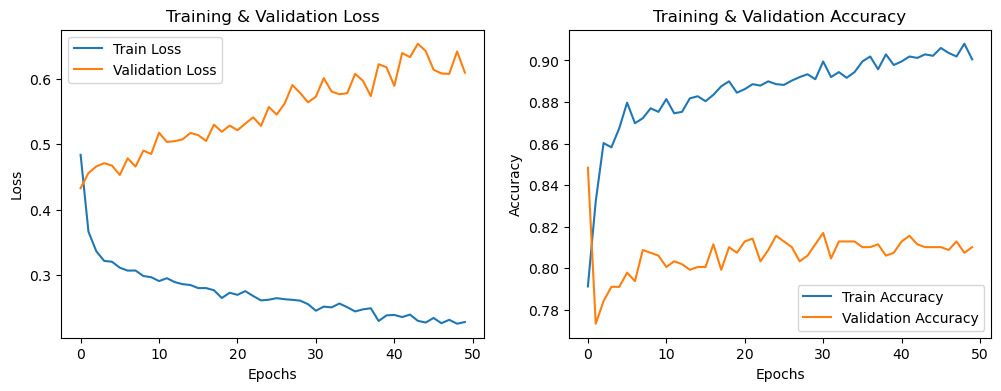

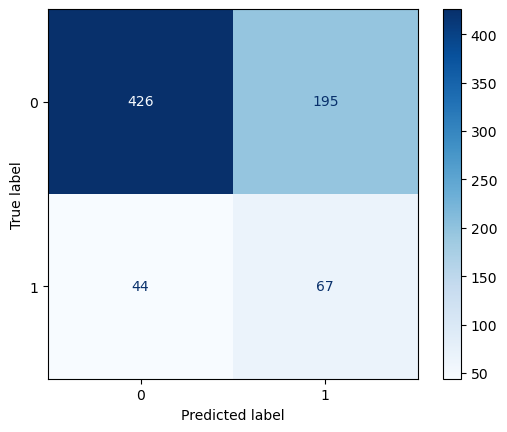

In [66]:
# Define the Feedforward Neural Network (FNN) model
def create_fnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),  # Regularization to prevent overfitting
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='tanh'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Create model
input_shape = X_train.shape[1]  # Number of features
fnn_model = create_fnn_model(input_shape)

# Train the model
history=fnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred_prob = fnn_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate evaluation metrics
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store results
results = {
    "Feedforward Neural Network (FNN)": {
        "AUC-ROC": auc,
        "F1 Score": f1
    }
}

# Print classification report
print("Feedforward Neural Network (FNN):\n", classification_report(y_test, y_pred))

# Plot Training Loss & Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.show()

# Compute performance metrics
accuracy_fnn = accuracy_score(y_test, y_pred)
f1_fnn = f1_score(y_test, y_pred)
auc_roc_fnn = roc_auc_score(y_test, y_pred_prob)

# Compute ROC Curve
fpr_fnn, tpr_fnn, _ = roc_curve(y_test, y_pred_prob)
cm_test_fnn = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test_dt).plot(cmap='Blues')
plt.show()


#### Observation
The FNN model acheives an accuracy of 85%


### Performance of all models

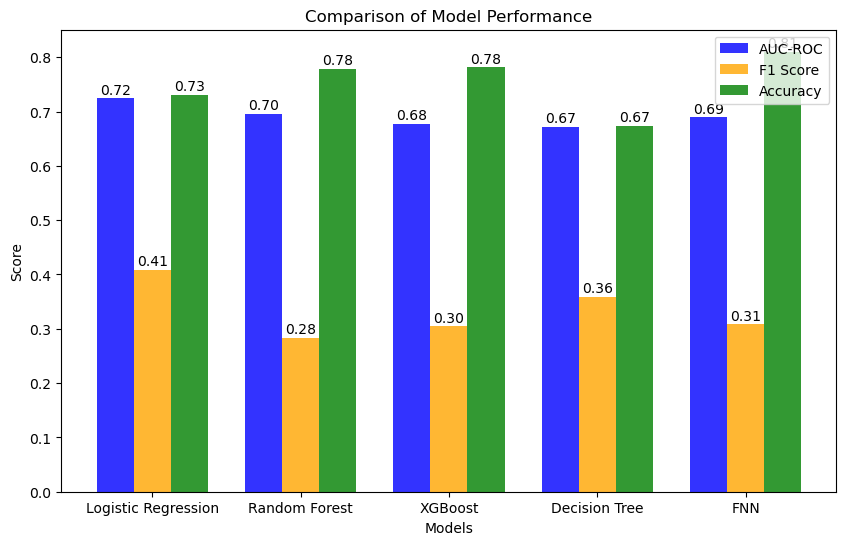

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual results
models = ["Logistic Regression", "Random Forest", "XGBoost","Decision Tree", "FNN"]
auc_scores = [auc_lr, auc_rf,auc_xgb, auc_roc_dt, auc_roc_fnn]  # Example AUC-ROC scores
f1_scores = [f1_lr,f1_rf,f1_xgb,f1_dt, f1_fnn]   # Example F1 scores
accuracy_scores = [accuracy_lr, accuracy_rf,accuracy_xgb, accuracy_dt, accuracy_fnn]  # Example Accuracy scores

# Plot Model Performance
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25  # Reduce bar width to fit all bars properly

x = np.arange(len(models))

bars1 = ax.bar(x - width, auc_scores, width, label="AUC-ROC", alpha=0.8, color="blue")
bars2 = ax.bar(x, f1_scores, width, label="F1 Score", alpha=0.8, color="orange")
bars3 = ax.bar(x + width, accuracy_scores, width, label="Accuracy", alpha=0.8, color="green")

ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Comparison of Model Performance")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
for bar_group in [bars1, bars2, bars3]:
    for bar in bar_group:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

plt.show()


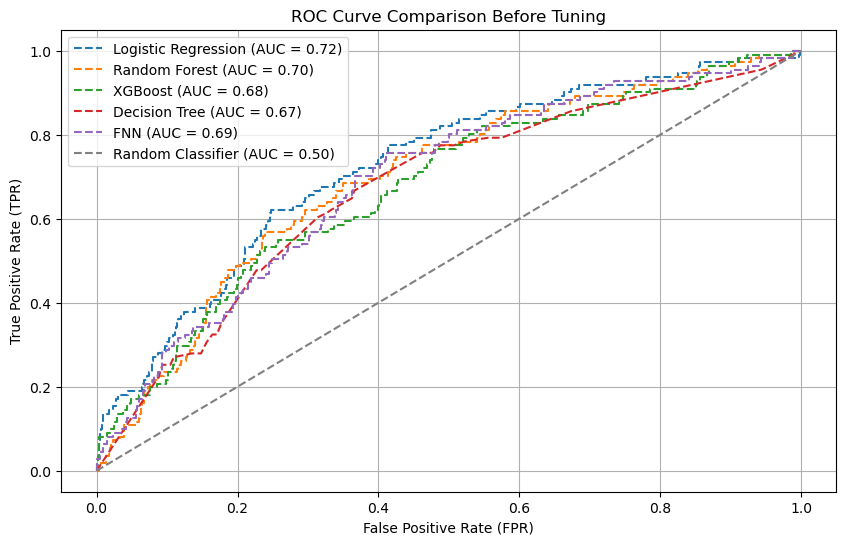

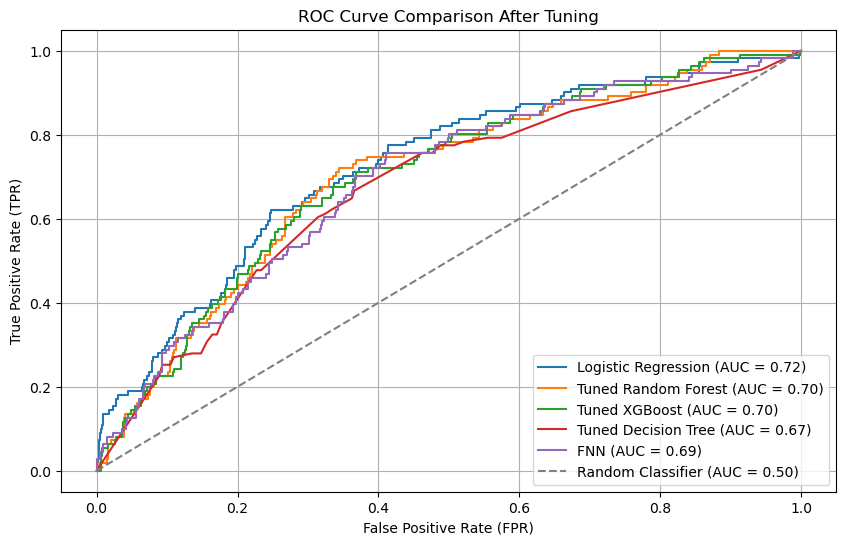

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = ["Logistic Regression", "Random Forest", "XGBoost", "Decision Tree", "FNN"]


# Plot ROC Curves Before Tuning
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", linestyle="--")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linestyle="--")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", linestyle="--")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_roc_dt:.2f})", linestyle="--")
plt.plot(fpr_fnn, tpr_fnn, label=f"FNN (AUC = {auc_roc_fnn:.2f})", linestyle="--")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison Before Tuning")
plt.legend()
plt.grid()
plt.show()

# Plot ROC Curves After Tuning
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf_best, tpr_rf_best, label=f"Tuned Random Forest (AUC = {auc_rf_best:.2f})")
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f"Tuned XGBoost (AUC = {auc_xgb_tuned:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Tuned Decision Tree (AUC = {auc_roc_dt:.2f})")
plt.plot(fpr_fnn, tpr_fnn, label=f"FNN (AUC = {auc_roc_fnn:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison After Tuning")
plt.legend()
plt.grid()
plt.show()


### Conclusion
FNN has the highest accuracy of 85%. Hence, the predicitve system model will be developed using FNN.

In [74]:
# Save the trained model and scaler
fnn_model.save("fnn_model.h5")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


## 6. Risk Stratification

In [76]:
def framingham_risk_score(age, totChol, sysBP, smoker, diabetes, gender):
    if gender == 1:  # Male
        risk_score = (52.00961 - (20.014077 * np.log(age)) + (0.65304 * np.log(totChol))
                      + (1.90997 * np.log(sysBP)) + (0.60138 * smoker)
                      + (0.57367 * diabetes))
        s0 = 0.88936  # Baseline survival probability for men
    else:  # Female
        risk_score = (31.764 - (26.0145 * np.log(age)) + (1.1237 * np.log(totChol))
                      + (2.5536 * np.log(sysBP)) + (0.65451 * smoker)
                      + (0.87976 * diabetes))
        s0 = 0.95012  # Baseline survival probability for women

    # Fix: Ensure `risk_score` doesn't cause extremely small values
    risk_score = max(0, risk_score)  # Prevents negative exponentiation issues
    risk_percentage = 1 - (s0 ** np.exp(risk_score))  

    return round(risk_percentage * 100, 2)

# 🚀 Risk Stratification
def stratify_risk(risk_score):
    if risk_score < 10:
        return "Low Risk 🟢"
    elif 10 < risk_score < 20:
        return "Moderate Risk 🟡"
    else:
        return "High Risk 🔴"


In [61]:
! pip install shap lime

C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Enter Age (20-90):  90
Enter Gender (1 = Male, 0 = Female):  1
Enter Total Cholesterol (100-400):  400
Enter Systolic BP (90-200):  200
Enter Diastolic BP (50-130):  130
Has Hypertension? (1 = Yes, 0 = No) [Default=0]:  1
Are you on BP medication? (1 = Yes, 0 = No) [Default=0]:  0
History of Stroke? (1 = Yes, 0 = No) [Default=0]:  1
Enter Heart Rate (40-140) [Default=75]:  140
Enter BMI (15-50):  50
Enter Glucose Level (50-300):  300
Do you have diabetes? (1 = Yes, 0 = No):  1
Are you a smoker? (1 = Yes, 0 = No):  1
Cigarettes per day? (0-70) [Default=0]:  70


C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Framingham Risk Score:11.06%
Risk Category:Moderate Risk 🟡
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step

🔮 **Predicted 10-Year CHD Probability:** 6.47%

SHAP Explanation:


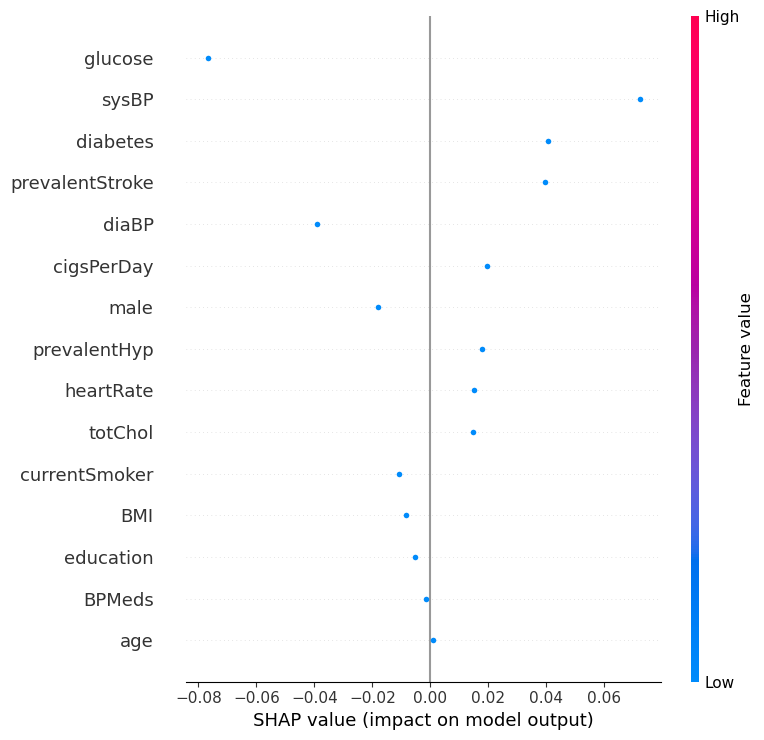

In [78]:
# Load Trained Model & Scaler
model = tf.keras.models.load_model("fnn_model.h5")
scaler = joblib.load("scaler_framingham.pkl")

# 🚀 Ensure the SHAP Explainer is trained on the correct dataset
X_train_scaled = scaler.transform(X_train)  # Ensure X_train is scaled properly

# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train_scaled)

# Function to Explain Individual Predictions
def explain_with_shap_lime(user_input):
    # Scale Input for Prediction
    user_input_scaled = scaler.transform(user_input)

    #  Calculate Framingham Risk Score (Fixed)
    frs_score = framingham_risk_score(age, totChol, sysBP, currentSmoker, diabetes, gender)
    risk_category = stratify_risk(frs_score)
    
    
    # Display Results
    print(f"Framingham Risk Score:{frs_score}%")
    print(f"Risk Category:{risk_category}")
    # Predict CHD Probability
    chd_prediction_prob = model.predict(user_input_scaled)[0][0] * 100
    print(f"\n🔮 **Predicted 10-Year CHD Probability:** {chd_prediction_prob:.2f}%")

    # 📌 **SHAP Explanation**
    shap_values = explainer(user_input_scaled)

    print("\nSHAP Explanation:")
    shap.summary_plot(shap_values, features=user_input_scaled, feature_names=X.columns)


# **User Input for Prediction**
age = int(input("Enter Age (20-90): "))
gender = int(input("Enter Gender (1 = Male, 0 = Female): "))

totChol = int(input("Enter Total Cholesterol (100-400): "))
sysBP = int(input("Enter Systolic BP (90-200): "))
diaBP = int(input("Enter Diastolic BP (50-130): "))
prevalentHyp = int(input("Has Hypertension? (1 = Yes, 0 = No) [Default=0]: ") or 0)
BPMeds = int(input("Are you on BP medication? (1 = Yes, 0 = No) [Default=0]: ") or 0)
prevalentStroke = int(input("History of Stroke? (1 = Yes, 0 = No) [Default=0]: ") or 0)
heartRate = int(input("Enter Heart Rate (40-140) [Default=75]: ") or 75)

BMI = float(input("Enter BMI (15-50): "))
glucose = int(input("Enter Glucose Level (50-300): "))
diabetes = int(input("Do you have diabetes? (1 = Yes, 0 = No): "))

# Fixed Defaults for Missing Features
education = 2
currentSmoker = int(input("Are you a smoker? (1 = Yes, 0 = No): "))
cigsPerDay = int(input("Cigarettes per day? (0-70) [Default=0]: ") or 0)

# Convert input into numpy array
user_input = np.array([[age, gender, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, 
                        diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose]])

# Call Explainability Function
explain_with_shap_lime(user_input)
